In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 6s 1us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

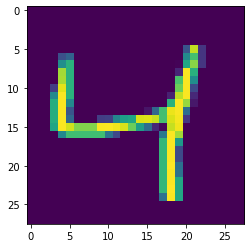

In [9]:
#to see 2 dim image object ust plt.imshow()
single_image=x_train[2]
plt.imshow(single_image)

In [11]:
#y is a categorical problem therfore OHE 
from tensorflow.keras.utils import to_categorical 

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example.shape

(60000, 10)

In [14]:
y_example[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [16]:
y_cat_train=to_categorical(y_train,10)

In [17]:
single_image.max()

255

In [18]:
single_image.min()

0

In [20]:
#to avoid going into gradient problems normalize the data between 0 and 1 

x_train=x_train/255
x_test=x_test/255

In [21]:
scaled_image = x_train[2]

In [22]:
scaled_image


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

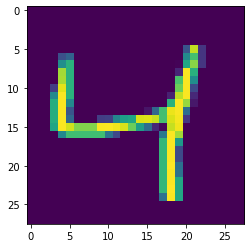

In [25]:
#still the scaled img will look the same 

plt.imshow(scaled_image)

In [26]:
#we will have to reshape the data into (60000,28,28,1) to let the cnn know that its a single chanel img ie grayscalex_train-

In [28]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [29]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [34]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(2,2))

#flatten the image into a single array to give it to a ann 28*28 
model.add(Flatten())
model.add(Dense(128,activation='relu'))
#output layer 
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [37]:
model.fit(x_train,y_cat_train,epochs=3,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/3
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0230 - accuracy: 0.9930 - val_loss: 0.0585 - val_accuracy: 0.9808
Epoch 2/3
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0359 - val_accuracy: 0.9884
Epoch 3/3
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0119 - accuracy: 0.9963 - val_loss: 0.0442 - val_accuracy: 0.9874


In [39]:
#model evaluation 
metrics=pd.DataFrame(model.history.history)
print(metrics)

       loss  accuracy  val_loss  val_accuracy
0  0.023018  0.992950  0.058480        0.9808
1  0.017205  0.994417  0.035929        0.9884
2  0.011936  0.996300  0.044208        0.9874


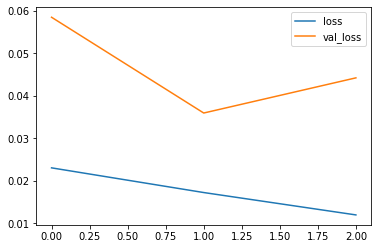

In [40]:
metrics[['loss','val_loss']].plot()

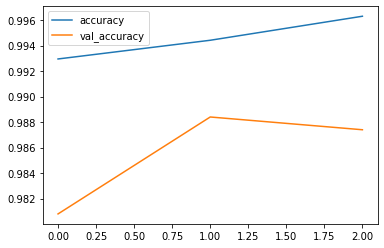

In [42]:
metrics[['accuracy','val_accuracy']].plot()

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
predictions=model.predict_classes(x_test)


C:\Users\admin\anaconda3\envs\mytfenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [48]:
print(confusion_matrix(y_test,predictions))

[[ 976    0    1    1    0    0    2    0    0    0]
 [   0 1129    1    1    0    1    3    0    0    0]
 [   1    0 1026    1    0    0    1    2    1    0]
 [   0    0    1 1006    0    1    0    0    1    1]
 [   1    0    0    0  967    0    6    0    1    7]
 [   2    0    1    9    0  875    5    0    0    0]
 [   6    1    0    0    1    0  950    0    0    0]
 [   1    1   11    1    1    0    0 1009    1    3]
 [   3    2    3    3    0    3    4    1  953    2]
 [   2    2    0    8    2    6    0    2    4  983]]


In [49]:
import seaborn as sns

In [52]:
my_number=x_test[4]

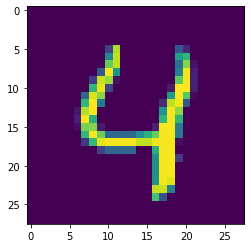

In [54]:
plt.imshow(my_number.reshape(28,28))

In [55]:
model.predict_classes(my_number.reshape(1,28,28,1))

C:\Users\admin\anaconda3\envs\mytfenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([4], dtype=int64)